In [1]:
import pandas as pd
import glob
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
glob.glob("FBOT_ForFed/*/*")

['FBOT_ForFed/OtherFast/iPTF16asu.json',
 'FBOT_ForFed/OtherFast/PTF09uj.json',
 'FBOT_ForFed/OtherFast/AT2018cow.tex',
 'FBOT_ForFed/PS1/Raw_Photometry',
 'FBOT_ForFed/PS1/Interpolated_PhotomProps',
 'FBOT_ForFed/PS1/Templates']

In [3]:
allps1 = pd.read_csv("FBOT_ForFed/PS1/Raw_Photometry/Table2_MachineReadable.dat", skiprows=19, sep=",", 
        names=["SN", "filter", "jd", "absmag", "mag", "error", "survey"])

In [4]:
SNe = allps1.SN.unique()

In [5]:
for sn in SNe:
    data = allps1[allps1.SN == sn].rename(columns={'filter':'band'})
    data['band'] = data.band.apply(lambda x: x.replace('_P1',""))
    print(data.band.unique())
    if data.mag.dropna().size == 0:
        data.mag = data.absmag
    data.to_csv("data/" + sn + ".csv")

['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']


In [6]:
#otherfast = 
def getotherfast(sn):
    phot = (pd.read_json("FBOT_ForFed/OtherFast/" + 
                           sn)[sn.replace('.json', '')].loc["photometry"])
    epochs = np.array([ph[0] for ph in phot])
    mag = np.array([ph[1] for ph in phot]).astype(float)
    error = np.array([ph[2] for ph in phot]).astype(float)
    filters = np.array([ph[4] for ph in phot])
    survey = np.array([ph[6] for ph in phot])
    SN = [sn] * len(phot)
    
    #print(np.unique(filters))
    return pd.DataFrame(data={"SN":SN, "band":filters, "jd":epochs, "mag":mag, 
                          "absmag":[np.nan] * len(phot), "error":error, "survey":survey})

getotherfast("iPTF16asu.json").to_csv("data/iPTF16asu.csv")
getotherfast("PTF09uj.json").to_csv("data/PTF09uj.csv")

In [7]:
pd.read_csv("tmp.csv", header=None).loc[0:8]
#names=[\tablehead{ \colhead{Phase (J)} & \colhead{J$^{a}$} &   \colhead{Phase (H)} &    \colhead{H} &\colhead{Phase (K)} & \colhead{K}  & Telescope\\
 #    (d)   & (mag) &  (d)  & (mag)  & (d)   & (mag)}
#	])
                  #skiprows=19, sep=",", 
        #names=["SN", "filter", "jd", "mag", "abmag", "error", "survey"])

,0,1,2,3,4,5,6,7,8,9
0,9.86,15.83,0.06,9.86,15.54,0.11,9.86,15.17,0.22,WIYN
1,9.90,15.90,0.04,9.91,15.24,0.04,9.92,14.99,0.05,UKIRT
2,13.83,16.27,0.05,13.84,15.72,0.04,13.84,15.50,0.05,UKIRT
3,22.85,16.76,0.10,22.86,15.75,0.05,22.87,15.87,0.08,UKIRT
4,26.82,17.51,0.20,26.83,15.84,0.05,26.85,15.76,0.07,UKIRT
5,30.86,18.07,0.37,30.88,16.11,0.06,30.89,15.90,0.07,UKIRT
6,35.82,18.24,0.40,34.93,17.18,0.14,35.84,15.98,0.08,UKIRT
7,39.80,18.99,0.87,35.83,15.81,0.05,41.84,16.76,0.12,UKIRT
8,41.82,18.52,0.51,39.82,15.85,0.05,--,--,UKIRT,NaN


In [38]:
gw = pd.read_csv("GW170817.csv")
gw.head()
#gw.rename(columns={"event":"SN", "time":"jd", "magnitude":"mag", 
#                  "e_magnitude":"error", "band":"band", "telescope":"survey"})[
#    ["SN", "band", "jd", "mag", "error", "survey"]].to_csv("data/GW170817.csv")
#allps1 = pd.read_csv("FBOT_ForFed/PS1/Raw_Photometry/Table2_MachineReadable.dat", skiprows=19, sep=",", 
#        names=["SN", "filter", "jd", "mag", "abmag", "error", "survey"])

,Unnamed: 0,SN,filter,jd,mag,error,survey
0,0,GW170817,r,57743.334,20.44,NaN,Prompt5
1,1,GW170817,r,57790.358,21.39,NaN,Prompt5
2,2,GW170817,r,57791.323,21.34,NaN,Prompt5
3,3,GW170817,r,57792.326,21.26,NaN,Prompt5
4,4,GW170817,r,57793.335,21.10,NaN,Prompt5


In [35]:
csvs = glob.glob("data/*.csv")

In [36]:
csvs


['data/PS1-13ess.csv',
 'data/PS1-13cgt.csv',
 'data/PTF09uj.csv',
 'data/iPTF16asu.csv',
 'data/PS1-11qr.csv',
 'data/PS1-10ah.csv',
 'data/PS1-12bv.csv',
 'data/PS1-13bit.csv',
 'data/PS1-12bb.csv',
 'data/PS1-13duy.csv',
 'data/PS1-10bjp.csv',
 'data/PS1-11bbq.csv',
 'data/PS1-12brf.csv',
 'data/PS1-10iu.csv',
 'data/PS1-13aea.csv',
 'data/GW170817.csv']

In [11]:
#example
data = pd.read_csv('data/PS1-13aea.csv')
data = data.replace(-99.9, np.nan)
data.columns

Index([u'Unnamed: 0', u'SN', u'band', u'jd', u'absmag', u'mag', u'error',
       u'survey'],
      dtype='object')

In [ ]:
def getmin(lc):
    
    data = pd.read_csv(lc)
    #print(data.columns)
    data = data.replace(-99.9, np.nan)
    
    tmin = data[['band', 'mag']].dropna(subset=["mag"]).\
            groupby("band").min()
    #print([data[(data['mag'] == tmin.loc[t].mag) & 
    #                (data['band'] == t)] for t in tmin.index])
    #indices = [(data['band'] == t) & (data['mag'] == tmin.loc[t].mag) 
    #                    for t in tmin.index]
    #data[(data['band'] == t)] ,
    mins = []
    for t in tmin.index:
        tmp_ = data[(data['mag'] == tmin.loc[t].mag) & 
                    (data['band'] == t)]
        if (tmp_.shape[0]) > 1:
            tmp_ = tmp_.iloc[1]

        mins.append(tmp_)
    mins = pd.concat(mins)
    #data[data.index[indices]]
    mins.index = mins['band']
    #, mins = data.loc[tmin])
    #print(mins.drop(["Unnamed: 0",  "Unnamed: 0.1"], axis=1))
    return mins, data, data.band.unique()

data/PS1-13ess.csv
('g', 8)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('r', 11)
('i', 6)
('z', 8)
data/PS1-13cgt.csv
('g', 8)
('r', 9)
('i', 13)
('z', 13)
data/PTF09uj.csv
('g', 2)
('i', 2)
('r', 3)
data/iPTF16asu.csv
('g', 15)
('i', 14)
('u', 1)
('r', 17)
data/PS1-11qr.csv
('g', 10)
('r', 8)
('i', 7)
('z', 7)
data/PS1-10ah.csv
('g', 18)
('r', 15)
('i', 12)
('z', 10)
data/PS1-12bv.csv
('g', 10)
('r', 9)
('i', 13)
('z', 17)
data/PS1-13bit.csv
('g', 7)
('r', 7)
('i', 13)
('z', 8)
data/PS1-12bb.csv
('g', 9)
('r', 9)
('i', 10)
('z', 12)
data/PS1-13duy.csv
('g', 2)
('r', 6)
('i', 6)
('z', 8)
data/PS1-10bjp.csv
('g', 16)
('r', 13)
('i', 14)
('z', 16)
data/PS1-11bbq.csv
('g', 7)
('r', 9)
('i', 12)
('z', 14)
data/PS1-12brf.csv
('g', 6)
('r', 5)
('i', 11)
('z', 11)
data/PS1-10iu.csv
('g', 14)
('r', 13)
('i', 9)
('z', 12)
data/PS1-13aea.csv
('g', 9)
('r', 10)
('i', 12)
('z', 13)
data/GW170817.csv
('r', 167)
('i', 82)
('z', 58)
('g', 64)
('u', 3)


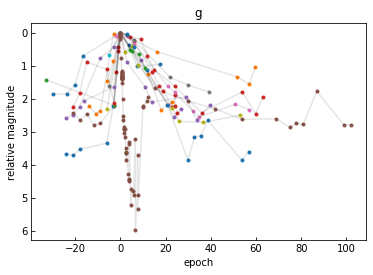

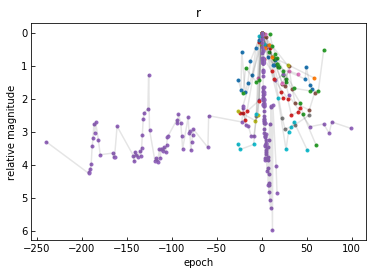

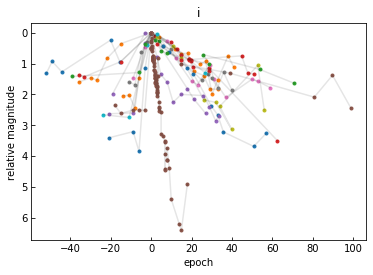

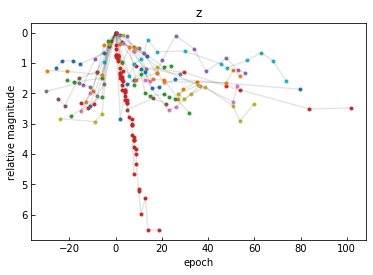

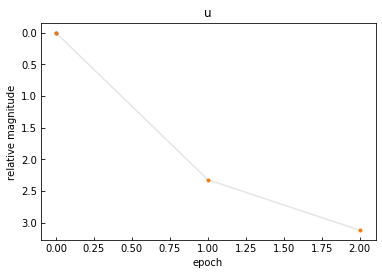

In [47]:
figs = {}
fastTs = []
for lc in csvs:
    print (lc)
    tmp = getmin(lc)
    #print(tmp[0])
    #continue
    tmp[1]['normmag'] = tmp[1]['mag']
    tmp[1]['trel'] = tmp[1]['jd']
            
    for i,b in enumerate(tmp[2]):
        if not b in ['r', 'g', 'i', 'z', 'u']:
            continue
        #print(tmp[1].index, b)
        #if not isinstance(tmp[0].loc[b].mag, float):
        #    print (tmp[0].loc[b]["mag"], tmp[0].loc[b].mag)
        #print(tmp[0].loc[b])
        #print (figs.keys())
        if b.lower() not in figs.keys():
            figs[b.lower()] = pl.figure().add_subplot(111)
            pl.gca().invert_yaxis()
            pl.title(b)
            pl.xlabel("epoch")
            pl.ylabel("relative magnitude")
        print(b, (tmp[1].band == b).sum())
        #print("here", tmp[0].loc[b].mag, b)
        #print(i, len(tmp[0].loc[b]))#['mag']) )
        try:
            tmp[1]['normmag'][tmp[1].band == b] = tmp[1][tmp[1].band == b].mag - tmp[0].loc[b].mag
            tmp[1]['trel'][tmp[1].band == b] -= tmp[0].loc[b].jd
            #print(tmp[1][['mag','normmag']], tmp[0].loc[b].mag)
        except:
            continue
        #print( tmp[0])
        #continue
        #print(tmp[1]['trel'][tmp[1].band == b], tmp[1]['normmag'][tmp[1].band == b])
        figs[b.lower()].plot(tmp[1]['trel'][tmp[1].band == b], tmp[1]['normmag'][tmp[1].band == b], '.')
        figs[b.lower()].plot(tmp[1]['trel'][tmp[1].band == b], tmp[1]['normmag'][tmp[1].band == b], 
                              'k-', alpha=0.1)
        fastTs.append(tmp[1][tmp[1].band == b])
    tmp[1].to_csv(lc.replace("data/","outputs").replace(".csv", "_normed.csv"))
    #print(tmp[1])

In [51]:
pd.concat(fastTs).drop(["Unnamed: 0"], 
                       axis=1).to_csv("allfast.csv", index=False)

In [52]:
pd.concat(fastTs).groupby("band").count()

,SN,Unnamed: 0,absmag,error,jd,mag,normmag,survey,trel
band,,,,,,,,,
g,205,205,86,116,205,205,205,196,205
i,236,236,91,155,236,236,236,223,236
r,302,302,85,160,302,302,302,289,302
u,4,4,0,4,4,4,4,1,4
z,207,207,103,110,207,207,207,197,207


In [53]:
pd.concat(fastTs).groupby("SN").count()

,Unnamed: 0,absmag,band,error,jd,mag,normmag,survey,trel
SN,,,,,,,,,
GW170817,374,0,374,269,374,374,374,333,374
PS1-10ah,55,55,55,19,55,55,55,55,55
PS1-10bjp,59,59,59,26,59,59,59,59,59
PS1-10iu,48,0,48,20,48,48,48,48,48
PS1-11bbq,42,42,42,9,42,42,42,42,42
PS1-11qr,32,32,32,17,32,32,32,32,32
PS1-12bb,40,40,40,19,40,40,40,40,40
PS1-12brf,33,33,33,21,33,33,33,33,33
PS1-12bv,49,49,49,19,49,49,49,49,49


In [54]:
pd.read_csv("allfast.csv")

,SN,absmag,band,error,jd,mag,normmag,survey,trel
0,PS1-13ess,-24.1,g,NaN,56619.400000,23.890000,1.870000,PS1,-30.000000
1,PS1-13ess,-19.1,g,NaN,56625.600000,23.870000,1.850000,PS1,-23.800000
2,PS1-13ess,-16.1,g,NaN,56629.300000,23.600000,1.580000,PS1,-20.100000
3,PS1-13ess,-13.1,g,NaN,56633.000000,22.720000,0.700000,PS1,-16.400000
4,PS1-13ess,0.0,g,0.120000,56649.400000,22.020000,0.000000,PS1,0.000000
5,PS1-13ess,3.0,g,0.100000,56653.100000,22.400000,0.380000,PS1,3.700000
6,PS1-13ess,6.0,g,0.220000,56656.800000,23.040000,1.020000,PS1,7.400000
7,PS1-13ess,14.0,g,NaN,56666.800000,22.980000,0.960000,PS1,17.400000
8,PS1-13ess,-20.8,r,NaN,56623.500000,23.680000,1.430000,PS1,-25.900000
9,PS1-13ess,-18.6,r,NaN,56626.200000,23.970000,1.720000,PS1,-23.200000
